In [22]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [31]:
np.hstack((r, r))

array([1.18569033, 1.1021577 , 1.12436416, 1.11852918, 1.03740209,
       1.12058987, 1.03686438, 1.17301575, 1.135737  , 1.04496843,
       1.02409889, 1.15726846, 1.1691383 , 1.00855646, 1.18223925,
       1.06758144, 1.16930372, 1.15315132, 1.17864515, 1.03897947,
       1.05064704, 1.15938797, 1.18124918, 1.18704813, 1.02759201,
       1.06148674, 1.15030023, 1.01734993, 1.090852  , 1.10715199,
       1.02284632, 1.0035043 , 1.06846664, 1.1085939 , 1.11529724,
       1.19433847, 1.04216711, 1.17949459, 1.15450333, 1.16714257,
       1.00034118, 1.05927809, 1.16218024, 1.0796587 , 1.01680084,
       1.028166  , 1.0903542 , 1.1249413 , 1.1185652 , 1.10626846,
       1.04918321, 1.18565021, 1.08398858, 1.09127117, 1.14080532,
       1.0664602 , 1.01197643, 1.05344357, 1.06217389, 1.11068654,
       1.04332693, 1.03336132, 1.06996651, 1.11483977, 1.09830672,
       1.00786099, 1.00466907, 1.16319343, 1.19443291, 1.15041772,
       1.06203764, 1.0400949 , 1.06841265, 1.1026276 , 1.14089

In [38]:
r = np.hstack((np.random.rand(200)*0.5+1, np.random.rand(200)*0.5+3, np.random.rand(200)*0.5+5, np.random.rand(200)*0.8+7, np.random.rand(200)*1+10))

theta = np.random.rand(1000)*2*math.pi
x = r*np.cos(theta)
y = r*np.sin(theta)


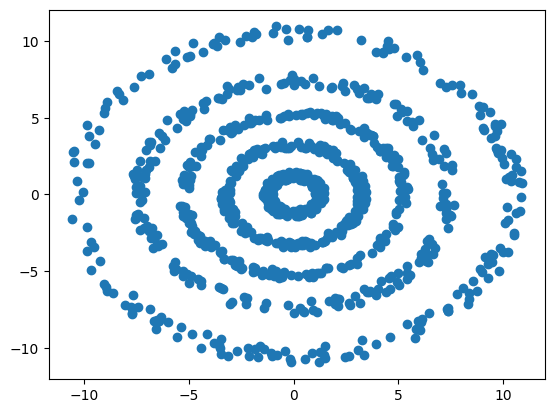

In [39]:
plt.scatter(x,y)

In [43]:
from typing import List, Union

In [128]:
class Kmeans:
    def __init__(self, k: int, max_iter: int, points: Union[np.ndarray, List[List[float]]]) -> None:
        if len(points)!=k:
            raise("Must have exactly k initial centroid!")
        self.k = k
        self.centroids = np.array(points)
        self.max_iter = max_iter
        
    def fit(self, X):
        for i in range(self.max_iter):
            dist = []
            for c in self.centroids:
                dist.append(((X-c) * (X-c)).sum(axis=1))
            idx = np.array(dist).argmin(axis=0)
            centroids_new = []
            for j in range(self.k):
                centroids_new.append(X[idx==j].mean(axis=0))
            if (np.array(centroids_new) == self.centroids).all():
                break
            else:
                self.centroids = np.array(centroids_new)
        
    def predict(self, X):
        dist = []
        for c in self.centroids:
            dist.append(((X-c) * (X-c)).sum(axis=1))
        idx = np.array(dist).argmin(axis=0)
        return idx

In [129]:
k = 5
p_init = X_train[np.random.choice(len(X_train), k)]

sup = Kmeans(k, 100, p_init)

In [130]:
X_train = np.array([[x[i], y[i]] for i in range(len(x))])

In [134]:
sup.fit(X_train)
label = sup.predict(X_train)

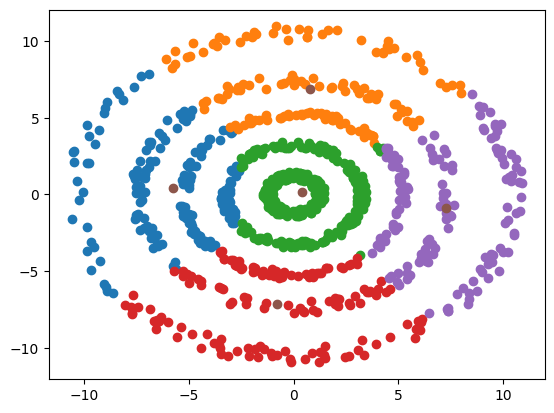

In [141]:
plt.scatter(X_train[label==0,0],X_train[label==0,1])
plt.scatter(X_train[label==1,0],X_train[label==1,1])
plt.scatter(X_train[label==2,0],X_train[label==2,1])
plt.scatter(X_train[label==3,0],X_train[label==3,1])
plt.scatter(X_train[label==4,0],X_train[label==4,1])

plt.scatter(sup.centroids[:,0], sup.centroids[:,1])

In [174]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.5)
model.fit(X_train)

DBSCAN(eps=1.5)

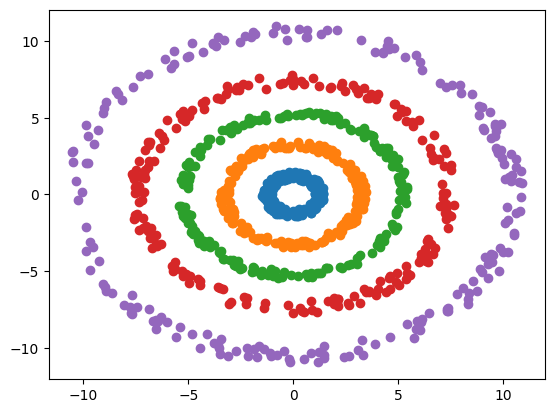

In [175]:
label = model.labels_
plt.scatter(X_train[label==0,0],X_train[label==0,1])
plt.scatter(X_train[label==1,0],X_train[label==1,1])
plt.scatter(X_train[label==2,0],X_train[label==2,1])
plt.scatter(X_train[label==3,0],X_train[label==3,1])
plt.scatter(X_train[label==4,0],X_train[label==4,1])

In [176]:
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1